In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Salary_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


Text(0, 0.5, 'salary')

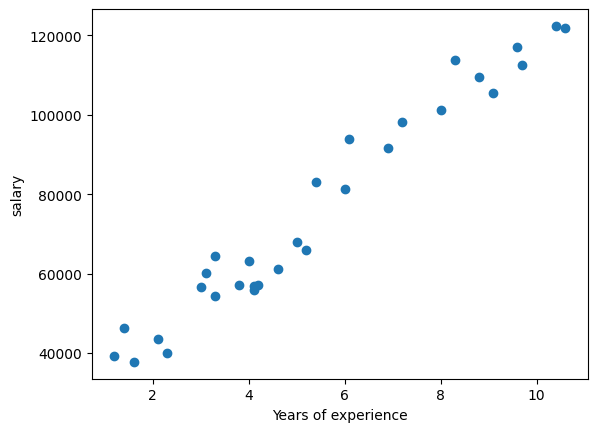

In [6]:
# scatter plot

plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('Years of experience')
plt.ylabel('salary')

In [7]:
# finding correlation
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


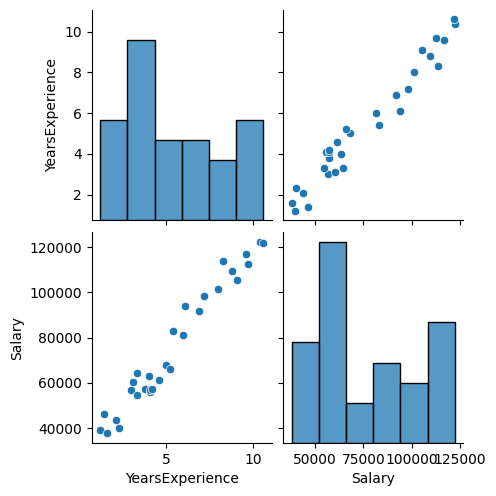

In [8]:
# seaborn for visualization

import seaborn as sns
sns.pairplot(df)

In [9]:
#  independent and dependent features

X=df[['YearsExperience']]   #independent features should be in form data frame or 2darray
y=df['Salary']               #in series or 1d array


In [10]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
X_train.shape

(22, 1)

In [12]:
X_test.shape

(8, 1)

In [13]:
#standardization

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)

In [14]:
X_test=sc.transform(X_test)

In [31]:
# apllying model

from sklearn.linear_model import LinearRegression


In [35]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
print("coefficients or slope:",lr.coef_)

array([25063.1519945])

In [41]:
print("intercept:",lr.intercept_)

intercept: 70417.40909090909


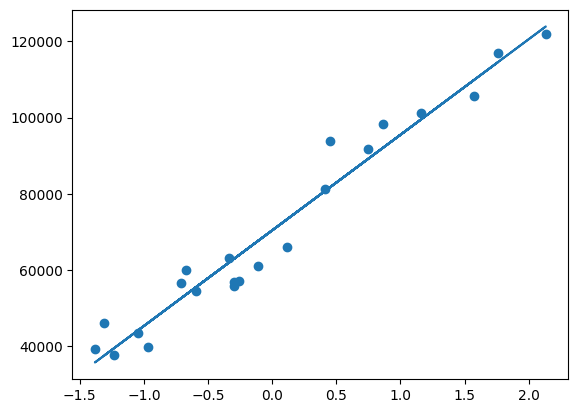

In [51]:
#  plot train data plot best fit line

plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train))

In [ ]:
#   y pred=25063.15(X_test) + 70417.41

In [53]:
# prediction for test dataa
y_pred=lr.predict(X_test)

In [61]:
#  performance metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [69]:
print("mse:",mse)
print("mae:",mae)
print("rmse:",rmse)

mse: 38802588.99247059
mae: 5056.9954666635895
rmse: 6229.172416338352


In [71]:
# calculate r^2

from sklearn.metrics import r2_score
scorer=r2_score(y_test,y_pred)

print("r2 score:",scorer)

r2 score: 0.9347210011126783


In [73]:
#  adjusted r2 scorer

1-(1-scorer)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9238411679647913

In [75]:
#  ols liinear regression

import statsmodels.api as sm

In [77]:
model=sm.OLS(y_train,X_train).fit()


In [81]:
prediction=model.predict(X_test)

In [83]:
prediction

array([ 45023.47271018,    979.6971356 ,  31904.0501986 ,   4728.10356748,
       -14951.03019988, -10265.52216003,  51583.18396597,  36589.55823845])

In [85]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.112
Model:                            OLS   Adj. R-squared (uncentered):              0.070
Method:                 Least Squares   F-statistic:                              2.645
Date:                Wed, 09 Apr 2025   Prob (F-statistic):                       0.119
Time:                        09:39:23   Log-Likelihood:                         -276.85
No. Observations:                  22   AIC:                                      555.7
Df Residuals:                      21   BIC:                                      556.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [87]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [93]:
#  prediction for new data
lr.predict(sc.transform([[7.1]]))

C:\Users\91781\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([91076.23999388])